# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [24]:
weather_api_key

'4b93245a0ef4300e60909f8f6f88101e'

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
unit = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&units=" + unit + "&appid=" + weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | najran
Processing Record 2 of Set 1 | bilibino
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | ilulissat
Processing Record 5 of Set 1 | susuman
Processing Record 6 of Set 1 | chimbarongo
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 10 of Set 1 | formosa
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | sinop
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | kyzyl-suu
Processing Record 16 of Set 1 | north bend
Processing Record 17 of Set 1 | myanaung
Processing Record 18 of Set 1 | bandrele
Processing Record 19 of Set 1 | ravar
Processing Record 20 of Set 1 | vershino-darasunskiy
Processing Record 21 of Set 1 | grytviken
Processing Record 22 of

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

In [5]:
# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [6]:
# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,najran,17.4924,44.1277,26.61,18,98,2.19,SA,1693275044
1,bilibino,68.0546,166.4372,11.63,49,97,5.04,RU,1693275045
2,albany,42.6001,-73.9662,19.80,94,100,0.91,US,1693274978
3,ilulissat,69.2167,-51.1000,6.01,93,75,3.09,GL,1693275047
4,susuman,62.7833,148.1667,16.70,50,14,1.12,RU,1693275049
5,chimbarongo,-34.7000,-71.0500,8.73,78,5,1.24,CL,1693274959
6,adamstown,-25.0660,-130.1015,22.09,86,100,13.67,PN,1693275054
7,puerto natales,-51.7236,-72.4875,0.69,93,100,1.60,CL,1693275055
8,formosa,-26.1775,-58.1781,13.93,59,0,2.88,AR,1693275058
9,waitangi,-43.9535,-176.5597,10.46,82,43,6.26,NZ,1693275059


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,najran,17.4924,44.1277,26.61,18,98,2.19,SA,1693275044
1,bilibino,68.0546,166.4372,11.63,49,97,5.04,RU,1693275045
2,albany,42.6001,-73.9662,19.80,94,100,0.91,US,1693274978
3,ilulissat,69.2167,-51.1000,6.01,93,75,3.09,GL,1693275047
4,susuman,62.7833,148.1667,16.70,50,14,1.12,RU,1693275049


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

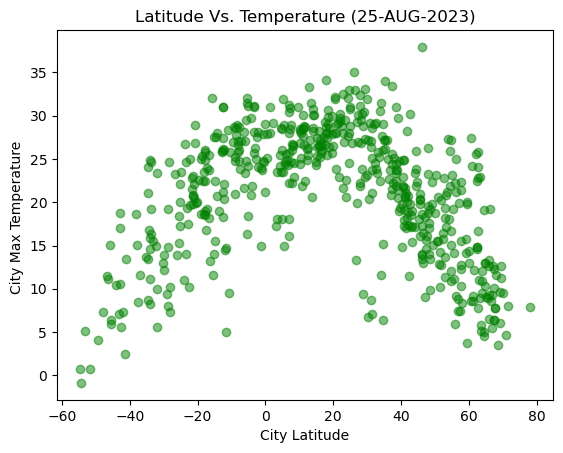

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', c='g', alpha=0.5 )

# Incorporate the other graph properties
plt.xlabel('City Latitude')
plt.ylabel('City Max Temperature ')
plt.title('Latitude Vs. Temperature (25-AUG-2023)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

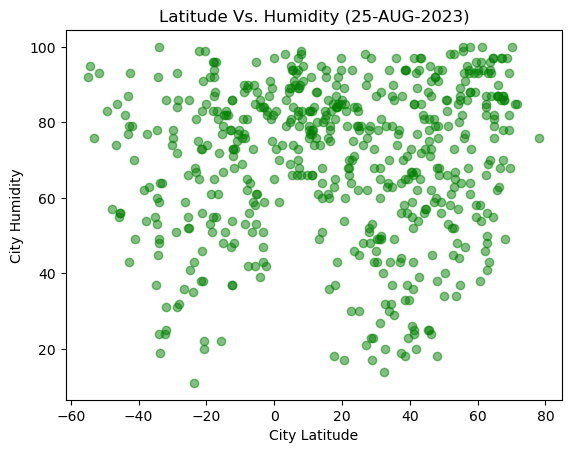

In [26]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', c='g', alpha=0.5 )

# Incorporate the other graph properties
plt.xlabel('City Latitude')
plt.ylabel('City Humidity')
plt.title('Latitude Vs. Humidity (25-AUG-2023)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

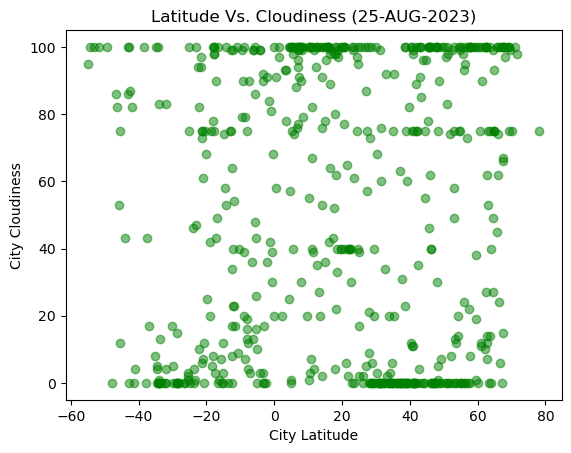

In [27]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', c='g', alpha=0.5 )

# Incorporate the other graph properties
plt.xlabel('City Latitude')
plt.ylabel('City Cloudiness')
plt.title('Latitude Vs. Cloudiness (25-AUG-2023)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed

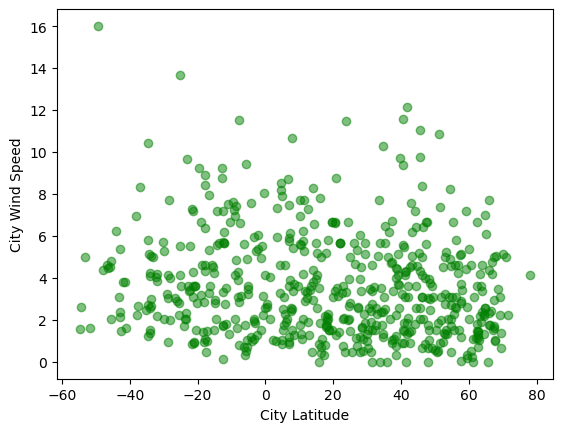

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', c='g', alpha=0.5 )

# Incorporate the other graph properties
plt.xlabel('City Latitude')
plt.ylabel('City Wind Speed')
plt.title('Latitude Vs. Wind Speed (25-AUG-2023)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# # Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, y_title, coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, c='g',alpha=0.5)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coordinates,fontsize=15,color="red")
    print(f"The r-value is: {rvalue}")
    plt.xlabel('Latitude')
    plt.ylabel(y_title)


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,najran,17.4924,44.1277,26.61,18,98,2.19,SA,1693275044
1,bilibino,68.0546,166.4372,11.63,49,97,5.04,RU,1693275045
2,albany,42.6001,-73.9662,19.80,94,100,0.91,US,1693274978
3,ilulissat,69.2167,-51.1000,6.01,93,75,3.09,GL,1693275047
4,susuman,62.7833,148.1667,16.70,50,14,1.12,RU,1693275049


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,chimbarongo,-34.7000,-71.0500,8.73,78,5,1.24,CL,1693274959
6,adamstown,-25.0660,-130.1015,22.09,86,100,13.67,PN,1693275054
7,puerto natales,-51.7236,-72.4875,0.69,93,100,1.60,CL,1693275055
8,formosa,-26.1775,-58.1781,13.93,59,0,2.88,AR,1693275058
9,waitangi,-43.9535,-176.5597,10.46,82,43,6.26,NZ,1693275059


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6936063726928745


Text(0.5, 1.0, 'Temperature Vs. Latitude - Northern Hemisphere (25-AUG-2023)')

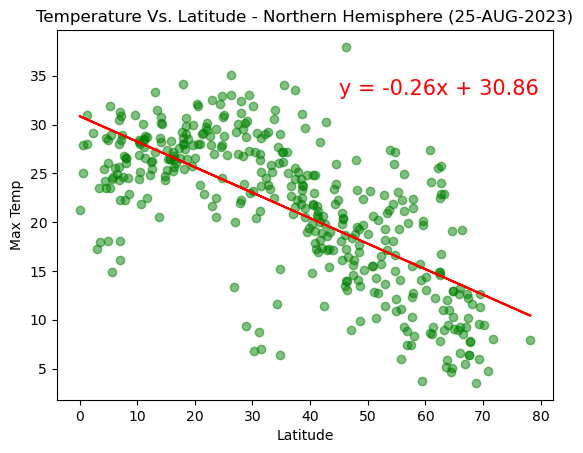

In [47]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plot_linear_regression(x_values, y_values, 'Max Temp', (45,33))
plt.ylabel('Max Temp')
plt.title('Temperature Vs. Latitude - Northern Hemisphere (25-AUG-2023)')

The r-value is: 0.7396120204427152


Text(0.5, 1.0, 'Temperature Vs. Latitude - Southern Hemisphere (25-AUG-2023)')

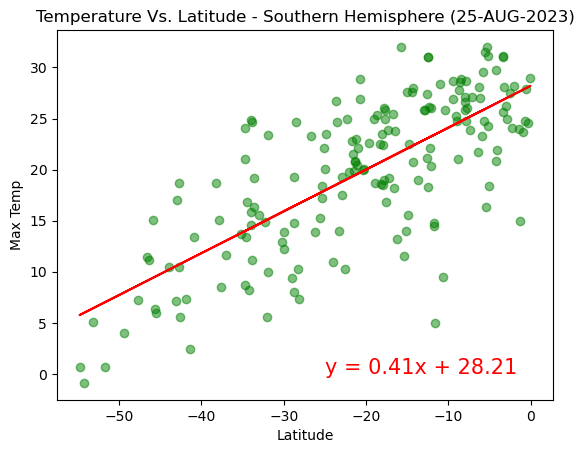

In [32]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plot_linear_regression(x_values, y_values, 'Max Temp', (-25,0))
plt.ylabel('Max Temp')
plt.title('Temperature Vs. Latitude - Southern Hemisphere (25-AUG-2023)')

**Discussion about the linear relationship:** 

The r-value is -0.6936 for the Northern Hemisphere variables (Latitude and Max Temp), indicating a strong negative relationship. 

The r-value is 0.7396 for the Southern Hemisphere variables (Latitude and Max Temp), indicating a strong positive relationship. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.024631947162845558


Text(0.5, 1.0, 'Humidity Vs. Latitude - Northern Hemisphere (25-AUG-2023)')

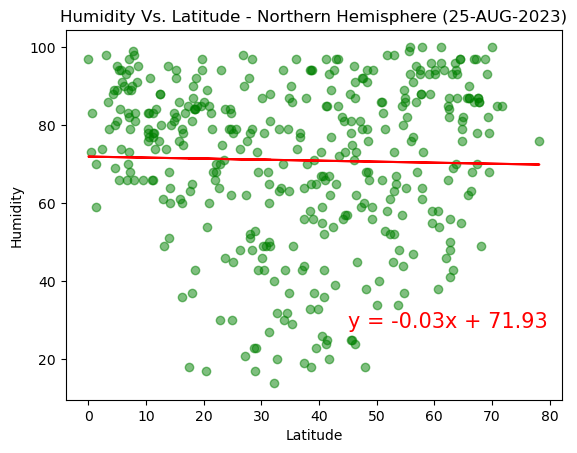

In [48]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, 'Max Temp', (45,28))
plt.ylabel('Humidity')
plt.title('Humidity Vs. Latitude - Northern Hemisphere (25-AUG-2023)')

The r-value is: 0.07549607210858529


Text(0.5, 1.0, 'Humidity Vs. Latitude - Southern Hemisphere (25-AUG-2023)')

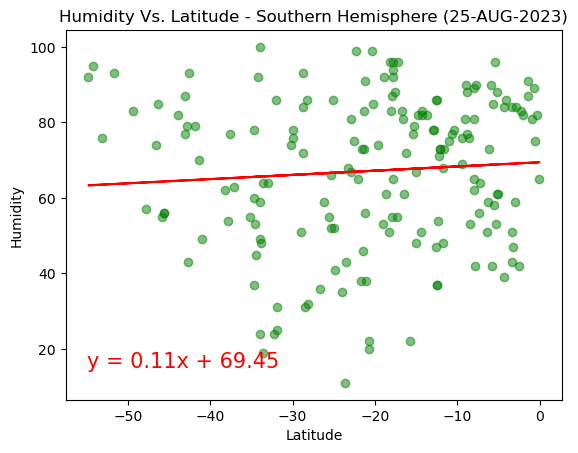

In [53]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, 'Max Temp', (-55, 15))
plt.ylabel('Humidity')
plt.title('Humidity Vs. Latitude - Southern Hemisphere (25-AUG-2023)')

**Discussion about the linear relationship:** 

The r-value is -0.0246 for the Northern Hemisphere variables (Latitude and Humidity), indicating a very weak negative relationship. 

The r-value is 0.0754, for the Southern Hemisphere variables (Latitude and Humidity), indicating a very weak positive relationship. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.10459099459910562


Text(0.5, 1.0, 'Cloudiness Vs. Latitude - Northern Hemisphere (25-AUG-2023)')

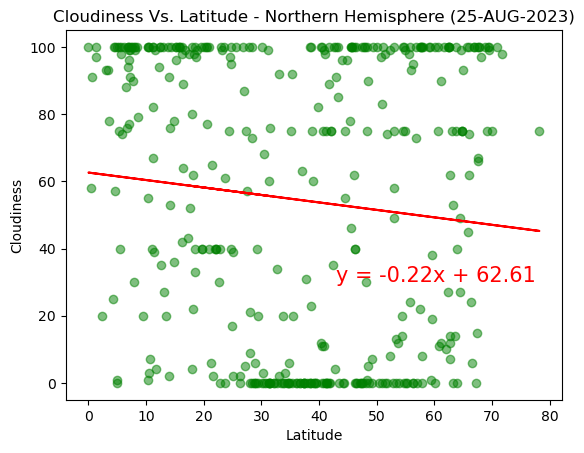

In [49]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, 'Max Temp', (43, 30))
plt.ylabel('Cloudiness')
plt.title('Cloudiness Vs. Latitude - Northern Hemisphere (25-AUG-2023)')

The r-value is: -8.545032746294671e-05


Text(0.5, 1.0, 'Cloudiness Vs. Latitude - Southern Hemisphere (25-AUG-2023)')

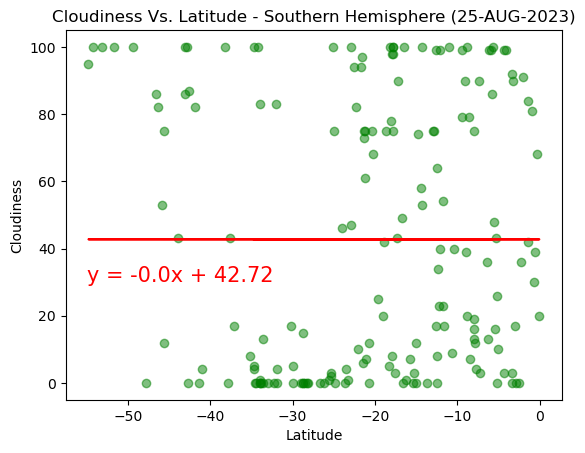

In [54]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, 'Max Temp', (-55,30))
plt.ylabel('Cloudiness')
plt.title('Cloudiness Vs. Latitude - Southern Hemisphere (25-AUG-2023)')

**Discussion about the linear relationship:** 

The r-value is -0.1045 for the Northern Hemisphere variables (Latitude and Cloudiness), indicating a very weak negative relationship. 

The r-value is -8.5450, for the Southern Hemisphere variables (Latitude and Cloudiness), indicating a very weak negative relationship.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.09912019421680145


Text(0.5, 1.0, 'Wind Speed Vs. Latitude - Northern Hemisphere (25-AUG-2023)')

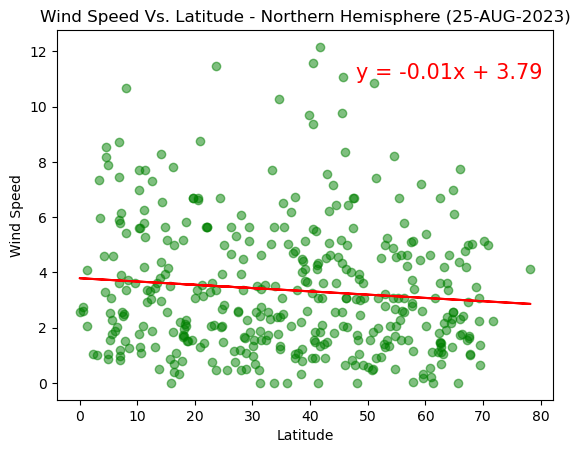

In [55]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, 'Max Temp', (48, 11))
plt.ylabel('Wind Speed')
plt.title('Wind Speed Vs. Latitude - Northern Hemisphere (25-AUG-2023)')

The r-value is: -0.014237093358436403


Text(0.5, 1.0, 'Wind Speed Vs. Latitude - Southern Hemisphere (25-AUG-2023)')

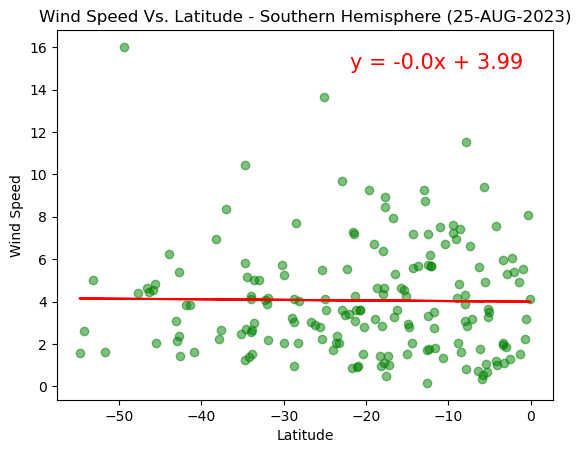

In [51]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plot_linear_regression(x_values, y_values, 'Max Temp', (-22,15))
plt.ylabel('Wind Speed')
plt.title('Wind Speed Vs. Latitude - Southern Hemisphere (25-AUG-2023)')

**Discussion about the linear relationship:** 

The r-value is -0.0991 for the Northern Hemisphere variables (Latitude and Wind Speed), indicating a very weak positive correlation. 

The r-value is -0.0142 for the Southern Hemisphere variables (Latitude and Wind Speed), indicating a weak/very weak negative correlation.